**Summary:** Code dedicated to implementing simple B&S pricing functions in Python, including implied Volatility functions.

#### Importing the necessary modules:

In [3]:
import numpy as np
from scipy.stats import norm
import scipy.optimize
import matplotlib.pyplot as plt

### **<center> Black & Scholes: </center>**

$$
d_{1} = \frac{ln(\frac{S_{0}}{X})+(rf + \frac{\sigma^2}{2})\cdot T}{\sigma \cdot \sqrt{T}}
$$

$$
d_{2} = d_{1} - \sigma \cdot \sqrt{T}
$$

- **Pricing a call option:**

$$
C_{0} = S_{0} \cdot N(d_{1}) - X \cdot e^{-rf \cdot T} \cdot N(d_{2})
$$

- **Pricing a put option:**

$$
P_{0} = X \cdot e^{-rf \cdot T} \cdot N(-d_{2}) - S_{0} \cdot N(-d_{1})
$$

- **Limits to the price of a call option (volatility):**

$$
\large{\lim_{\sigma \to 0} C_{o} = S_{o} - \frac{X}{e^{rf\cdot T}}}
$$

$$
\large{\lim_{\sigma \to \infty} C_{o} = S_{o}}
$$

- **Limits to the price of a put option (volatility):**

$$
\large{\lim_{\sigma \to 0} P_{o} = \frac{X}{e^{rf\cdot T}} - S_{o}}
$$

$$
\large{\lim_{\sigma \to \infty} P_{o} = \frac{X}{e^{rf\cdot T}}}
$$

In [12]:
# Function to price a call option according to B&S model:
def price_call_bs(X, T, So, rf, sigma): 
    d1 = (np.log(So/X) + (rf+sigma**2/2)*T)/(sigma*(T**0.5))
    d2 = d1 - sigma*(T**0.5)
    Co = So*norm.cdf(d1)-X*np.exp(-rf*T)*norm.cdf(d2)
    return Co

# Function to price a put option according to B&S model:
def price_put_bs(X, T, So, rf, sigma): 
    d1 = (np.log(So/X) + (rf+sigma**2/2)*T)/(sigma*(T**0.5))
    d2 = d1 - sigma*(T**0.5)
    Po = X*np.exp(-rf*T)*norm.cdf(-d2) - So*norm.cdf(-d1)
    return Po

# Function to calculate the implied volatility for a call option:
def implied_vol_call(X, T, So, rf, Co):
    np.seterr(divide = 'ignore') 
    if Co > So: 
        return print("Value for the call option can't be higher than the value of the underlying asset = {0}.".format(So))
    if Co < So - X/np.exp(rf*T):
        return print("Value for the call option can't be smaller than So - X/e^(rf*T) = {0}".format(So - X/np.exp(rf*T)))
    else:
        guess = 0.5

        function = lambda x: (price_call_bs(X, T, So, rf, x) - Co)**2

        bnds = ((0, None),)

        implied_vol = scipy.optimize.minimize(function, guess, method = "SLSQP", options = {"disp": False},
                                             bounds=bnds).x
        return implied_vol[0]

# Function to calculate the implied volatility for a put option:
def implied_vol_put(X, T, So, rf, Po):
    np.seterr(divide = 'ignore') 
    if Po > X/np.exp(rf*T): 
        return print("Value for the put option can't be higher than X/e^(rf*T) = {0}.".format(X/np.exp(rf*T)))
    if Po < X/np.exp(rf*T) - So:
        return print("Value for the put option can't be smaller than X/e^(rf*T) - So = {0}.".format(X/np.exp(rf*T) - So))
    else:
        guess = 0.5

        function = lambda x: (price_put_bs(X, T, So, rf, x) - Po)**2

        bnds = ((0, None),)

        implied_vol = scipy.optimize.minimize(function, guess, method = "SLSQP", options = {"disp": False},
                                             bounds=bnds).x
        return implied_vol[0]

def plot_call_implied_vol_price(X, T, So, rf):
    implied_vol_values = np.linspace(0.01, 10, 300)
    Co_values = []
    for i in implied_vol_values:
        Co_values.append(price_call_bs(X, T, So, rf, i))
    plt.figure(figsize=(16,6))
    plt.title("Call: Price x Implied Volatility", fontsize=14)
    plt.ylabel("Call Option Value (Co)",fontsize=13)
    plt.xlabel("Implied Volatility",fontsize=13)
    plt.plot(implied_vol_values, Co_values)
    
def plot_put_implied_vol_price(X, T, So, rf):
    implied_vol_values = np.linspace(0.01, 10, 300)
    Co_values = []
    for i in implied_vol_values:
        Co_values.append(price_put_bs(X, T, So, rf, i))
    plt.figure(figsize=(16,6))
    plt.title("Put: Price x Implied Volatility", fontsize=14)
    plt.ylabel("Put option Value (Po)",fontsize=13)
    plt.xlabel("Implied Volatility",fontsize=13)
    plt.plot(implied_vol_values, Co_values)

In [13]:
price_call_bs(X = 50, T = 1, So = 35, rf = 0.07, sigma = 3)

29.618944954560522

In [14]:
price_put_bs(X = 50, T = 1, So = 35, rf = 0.07, sigma = 3)

41.23863594985793

In [15]:
implied_vol_call(X = 40, T = 0.5, So = 50, rf = 0.1, Co = 10)

Value for the call option can't be smaller than So - X/e^(rf*T) = 11.950823019971445


In [16]:
implied_vol_put(X = 50, T = 1, So = 50, rf = 0.1, Po = 100)

Value for the put option can't be higher than X/e^(rf*T) = 45.241870901797974.


In [17]:
implied_vol_put(X = 50, T = 1, So = 35, rf = 0.07, Po = 46)

8.120694683752376

In [18]:
implied_vol_call(X = 50, T = 1, So = 35, rf = 0.07, Co = 1.35)

0.3248198791225162

#### Price x Implied Volatility:

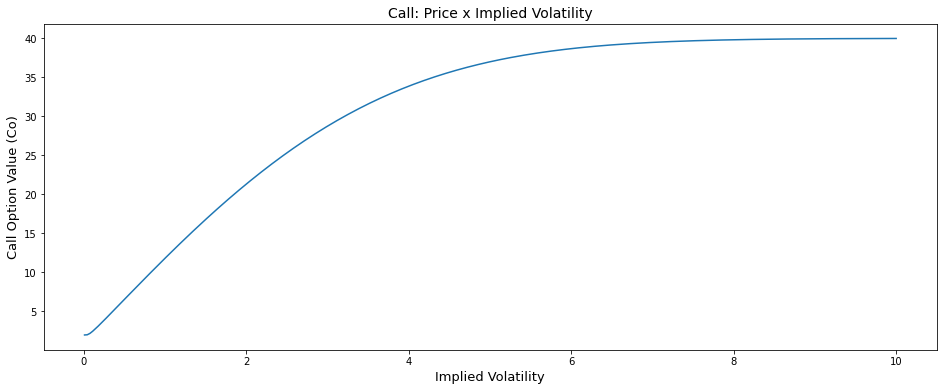

In [19]:
plot_call_implied_vol_price(40,0.5,40,0.1);

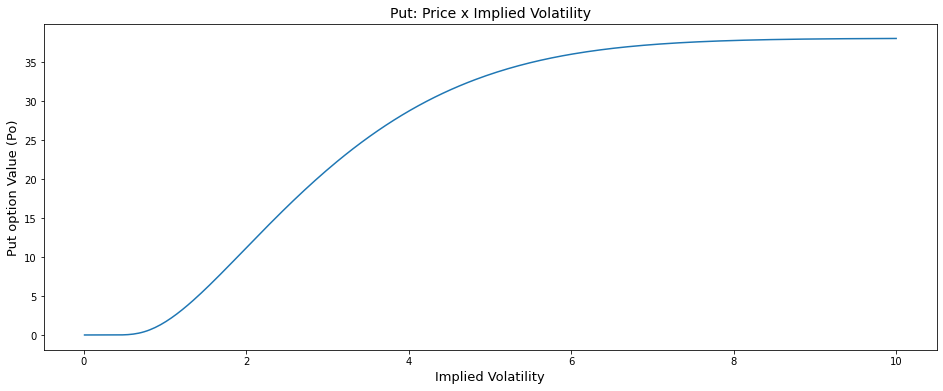

In [20]:
plot_put_implied_vol_price(X = 40, T = 0.5, So = 100, rf = 0.1);

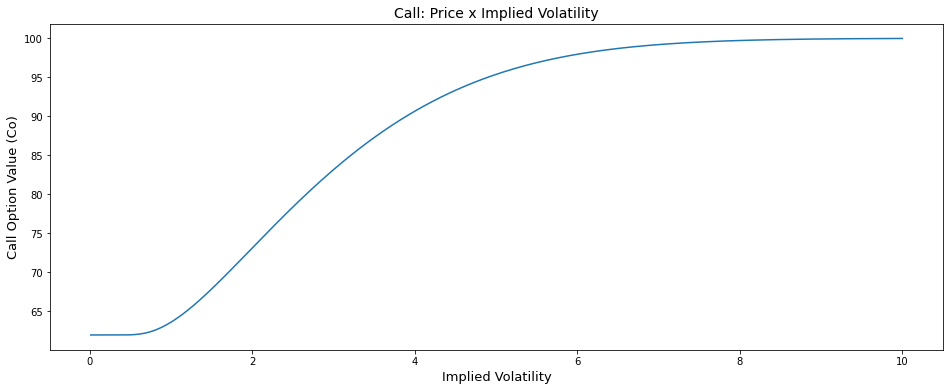

In [21]:
plot_call_implied_vol_price(X = 40, T = 0.5, So = 100, rf = 0.1);

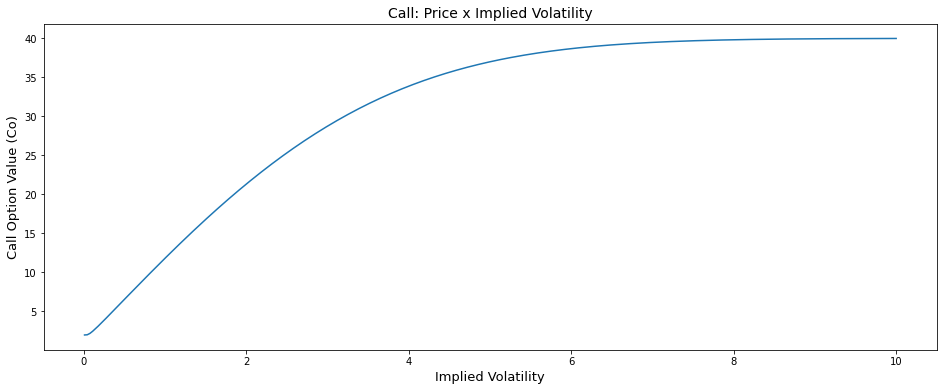

In [22]:
plot_call_implied_vol_price(X = 40, T = 0.5, So = 40, rf = 0.1);

In [48]:
implied_vol_put(X = 50, T = 1, So = 50, rf = 0.07, Po = 3.5)

0.26079255574751203

In [49]:
price_call_bs(X = 50, T = 1, So = 50, rf = 0.07, sigma = implied_vol_put(X = 50, T = 1, So = 50, rf = 0.07, Po = 3.5))

6.880524026886157